<a href="https://colab.research.google.com/github/waqas-manzoor5595/Machine_learning_projects-b-/blob/main/Log_reg_MYCREDIT_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
cred = pd.read_csv(r'/content/MyCreditData (1).csv')
cred.head()

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,other_debtors,present_residence,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,gender,profit
0,3,18,0,2,1049,4,2,2,2,3,...,21,1,0,0,1,0,0,0,female,242
1,3,9,0,5,2799,4,0,1,2,0,...,36,1,0,1,1,1,0,0,male,596
2,0,12,4,8,841,0,1,1,2,3,...,23,1,0,0,3,0,0,0,female,25
3,3,12,0,5,2122,4,0,0,2,0,...,39,1,0,1,3,1,0,1,male,568
4,3,12,0,5,2171,4,0,2,2,3,...,38,0,2,1,3,0,0,1,male,782


In [4]:
non_categorical_columns = ['duration', 'amount', 'age', 'profit']

for column in cred.columns:
  if column not in non_categorical_columns:
    cred[column] = cred[column].astype('category')

In [5]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account         1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_duration      1000 non-null   category
 7   installment_rate         1000 non-null   category
 8   other_debtors            1000 non-null   category
 9   present_residence        1000 non-null   category
 10  property                 1000 non-null   category
 11  age                      1000 non-null   int64   
 12  other_installment_plans  1000 non-null   category
 13  housing                  1000 non-null   category
 14  number_cr

In [6]:
cred['is_profitable'] = cred['profit'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
cred['is_profitable'].head()

,is_profitable
0,1
1,1
2,1
3,1
4,1


In [8]:
y = cred['is_profitable']
X = cred.iloc[:, : -2]

In [9]:
x_dummies = pd.get_dummies(X, drop_first=True).astype(int)
x_dummies.head()

,duration,amount,age,checking_account_1,checking_account_2,checking_account_3,credit_history_1,credit_history_2,credit_history_3,credit_history_4,...,number_credits_2,number_credits_3,job_1,job_2,job_3,people_liable_1,telephone_1,foreign_worker_1,gender_male,gender_nonbinary/notreported
0,18,1049,21,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9,2799,36,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,12,841,23,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,12,2122,39,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0
4,12,2171,38,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_dummies, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(penalty = 'none', solver = 'lbfgs', max_iter = 400)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty='none')

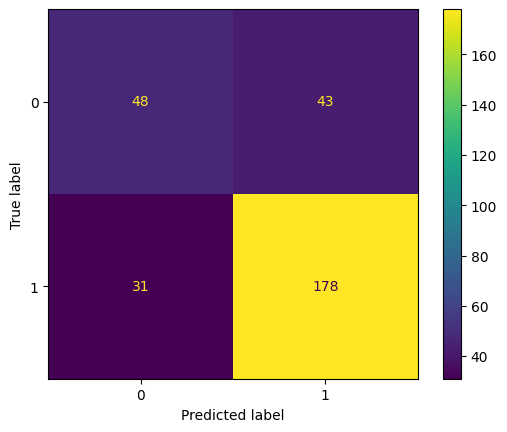

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)

In [12]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve

y_pred = log_reg.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(precision_score(y_test, y_pred),2)}')
print(f'F1-score: {round(f1_score(y_test, y_pred),2)}')
print(f'Recall(sensitivity): {round(recall_score(y_test, y_pred, pos_label= 1),2)}')
print(f'Recall(specificity): {round(recall_score(y_test, y_pred, pos_label= 0),2)}')

Accuracy: 0.75
Precision: 0.81
F1-score: 0.83
Recall(sensitivity): 0.85
Recall(specificity): 0.53


In [13]:

lr_pred_prob_train = log_reg.predict_proba(X_train)[:, 1]
lr_pred_prob_test = log_reg.predict_proba(X_test)[:, 1]

#Auc
lr_auc_train = roc_auc_score(y_train, lr_pred_prob_train)
lr_auc_test = roc_auc_score(y_test, lr_pred_prob_test)

print(f'Train AUC: {round(lr_auc_train,2)}')
print(f'Test AUC: {round(lr_auc_test,2)}')



Train AUC: 0.83
Test AUC: 0.78


In [14]:
#1-spec and sensitivity
lr_1sp_train, lr_sen_train, _ = roc_curve(y_train, lr_pred_prob_train)
lr_1sp_test, lr_sen_test, _ = roc_curve(y_test, lr_pred_prob_test)

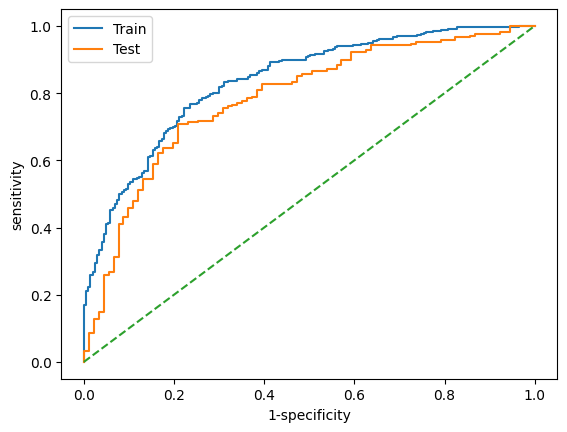

In [15]:
plt.plot(lr_1sp_train,lr_sen_train, label = 'Train')
plt.plot(lr_1sp_test,lr_sen_test, label = 'Test')
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

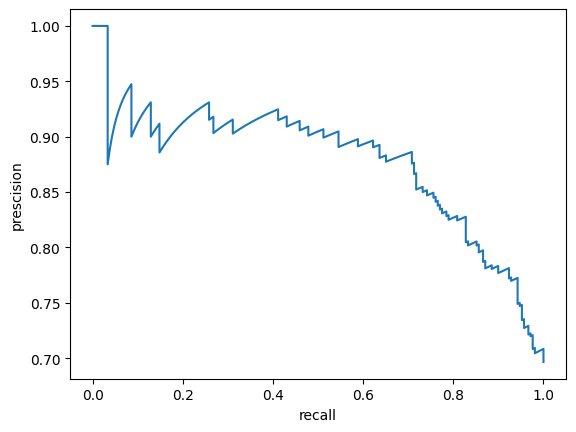

In [16]:
#prescision recall curve
from sklearn.metrics import precision_recall_curve
prescision, recall, _ = precision_recall_curve(y_test, lr_pred_prob_test)

plt.plot(recall, prescision)
plt.xlabel('recall')
plt.ylabel('prescision')
plt.show()

In [17]:
profit_arr = np.array(cred['profit'])

profit_train, profit_test = train_test_split(profit_arr, test_size=0.3, random_state=42)

fn_cost = abs(np.mean(profit_train[profit_train >= 0]))
fp_cost = abs(np.mean(profit_train[profit_train < 0]))

print(f'False negative cost: {round(fn_cost,2)}')
print(f'False positive cost: {round(fp_cost,2)}')

False negative cost: 503.47
False positive cost: 1198.5


In [18]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)

f_p = cf[0][1]
f_n = cf[1][0]

print(f'False positive: {f_p}')
print(f'False negative: {f_n}')
print(cf)

False positive: 43
False negative: 31
[[ 48  43]
 [ 31 178]]


In [19]:
missclassification_cost = f_n * fn_cost + f_p * fp_cost
print(f'Missclassification cost: {round(missclassification_cost,2)}')

Missclassification cost: 67143.4


In [20]:
#cost b4 model
fp_cost * np.count_nonzero(y_test==0)

109063.95049504952

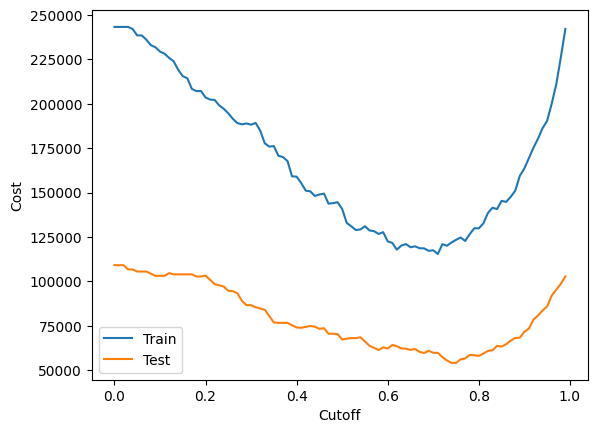

Best cutoff: 0.71


In [25]:
cost_training = []
cost_testing = []

for cutoff in np.arange(0,1,0.01):
  curr_preds = np.where(lr_pred_prob_train >= cutoff, 1, 0)
  curr_cf = confusion_matrix(y_train, curr_preds)
  curr_cf_cost = curr_cf[0][1] * fp_cost + curr_cf[1][0] * fn_cost
  cost_training.append(curr_cf_cost)

  curr_preds = np.where(lr_pred_prob_test >= cutoff, 1, 0)
  curr_cf = confusion_matrix(y_test, curr_preds)
  curr_cf_cost = curr_cf[0][1] * fp_cost + curr_cf[1][0] * fn_cost
  cost_testing.append(curr_cf_cost)

# Creating x-values

cutoffs = np.arange(0,1,0.01)
# plot

plt.plot(cutoffs, cost_training, label = 'Train')
plt.plot(cutoffs, cost_testing, label = 'Test')
plt.xlabel('Cutoff')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Finding best cutoff

best_cost = min(cost_training)
best_cutoff = cutoffs[cost_training.index(best_cost)]

print(f'Best cutoff: {round(best_cutoff,2)}')


In [26]:
bestval_cost = cost_testing[cost_training.index(best_cost)]
print(f'Best validation cost: {round(bestval_cost,2)}')

Best validation cost: 59667.58
